<a href="https://colab.research.google.com/github/owenburton/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [51]:
def m_v_std(alist):
  mean = sum(alist) / len(alist)
  differences = [num-mean for num in alist]
  difs_sq = [num**2 for num in differences]
  variance = sum(difs_sq) / (len(alist)-1)
  stan_dev = variance**.5
  return mean, variance, stan_dev

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print(f'mean: {m_v_std(sales)[0]}, variance: {m_v_std(sales)[1]}, standard deviation: {m_v_std(sales)[2]}')

mean: 3052.714285714286, variance: 214387.90476190473, standard deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd

customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales': sales, 'customers': customers})

sls_cust_cov = df.cov().iloc[0,1]

In [54]:
print(f'covariance: {sls_cust_cov}')

covariance: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [55]:
# Customers and sales standard deviations
std_cust = m_v_std(customers)[2]
std_sls = m_v_std(sales)[2]

# Correlation coefficiant
cor_co = sls_cust_cov / (std_cust * std_sls)

print(f'The correlation coefficient of sales and customers: {cor_co}')

The correlation coefficient of sales and customers: 0.9628339778148909


In [56]:
# Checking my work
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [58]:
# Variance-covariance matrix
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [60]:
# Correlation matrix
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

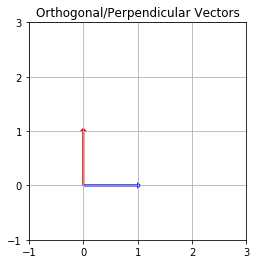

In [128]:
# Plot two orthogonal, or perpendicular, vectors.
plt.arrow(0,0, 0, 1, width=.02, head_width=.1, head_length=0.05, color ='r')
plt.arrow(0,0, 1, 0, width=.02, head_width=.1, head_length=0.05, color ='b')
plt.axis('square')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.yticks(range(-1,4))
plt.grid()
plt.title("Orthogonal/Perpendicular Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np

In [76]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

-40

Not orthogonal, because the dot product of the two vectors isn't zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 5, 20])

In [90]:
# Norm of c, then squared.
(np.linalg.norm(c))**2

653.9999999999999

In [91]:
# Dot product of c and c.
np.dot(c, c)

654

In [97]:
# Product of c transposed and c.
(c.T)*c

array([  4, 225,  25, 400])

The first two values are the same, and are also equal to the sum of values in the product of c transposed and c.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [102]:
f = [4, 12, 11, 9, 2]
f_norm = np.linalg.norm(f)
f_unit_vector = f / f_norm

print(f_unit_vector)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

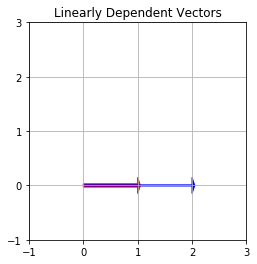

In [135]:
# Linearly dependent vectors
plt.arrow(0,0, 1, 0, width=.06, head_width=.3, head_length=0.05, color ='r')
plt.arrow(0,0, 2, 0, width=.02, head_width=.3, head_length=0.05, color ='b')
plt.axis('square')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.yticks(range(-1,4))
plt.grid()
plt.title("Linearly Dependent Vectors")
plt.show()

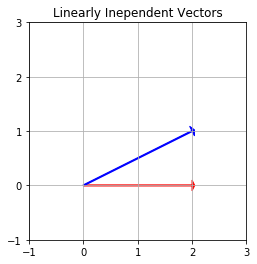

In [139]:
# Linearly independent vectors
plt.arrow(0,0, 2, 0, width=.02, head_width=.2, head_length=0.05, color ='r')
plt.arrow(0,0, 2, 1, width=.02, head_width=.2, head_length=0.05, color ='b')
plt.axis('square')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.yticks(range(-1,4))
plt.grid()
plt.title("Linearly Inependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [146]:
matrix = np.array([[1, 2], [4, 8]])

np.linalg.det(matrix)

0.0

The span of vectors g and h is $\mathbb{R}$.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [147]:
mat_lmn = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.det(mat_lmn)

-19.999999999999996

The span of the matrix that includes vectors l, m, and n is $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



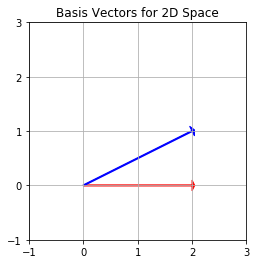

In [148]:
# Vectors that form the basis of 2D space
plt.arrow(0,0, 2, 0, width=.02, head_width=.2, head_length=0.05, color ='r')
plt.arrow(0,0, 2, 1, width=.02, head_width=.2, head_length=0.05, color ='b')
plt.axis('square')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.yticks(range(-1,4))
plt.grid()
plt.title("Basis Vectors for 2D Space")
plt.show()

## 6.2 What does it mean to form a basis?

Vectors that are linearly independent can form the basis for a space. Their linear combinations fill that space, so they can form the basis of that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [151]:
mat_p = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

print(f'rank of P: {np.linalg.matrix_rank(mat_p)}')

rank of P: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

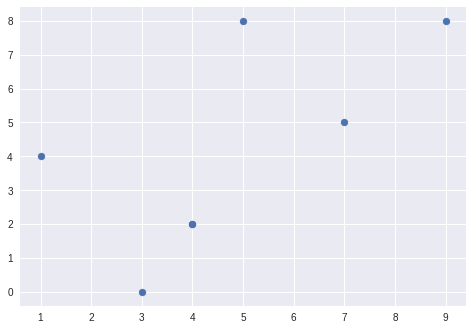

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()